In [1]:
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print, inspect, traceback, pretty

from chaotic_carbon_networks.preprocessing import concat_data
from chaotic_carbon_networks.adjencency_matrix import calc_adjacency_matrix, calc_link_length, calc_similarity_matrix_v4
from chaotic_carbon_networks.utils import mask_oceans, plot_world, mask_poles
from chaotic_carbon_networks.population_masking import mask_population
from chaotic_carbon_networks.anomaly_correction import anomaly_correction_week, anomaly_correction_month, anomaly_correction_spatial
from chaotic_carbon_networks.measures import calc_degrees, calc_avg_link_length


sns.set_theme(context='paper', style="whitegrid", palette="Set2", font_scale=1.5, rc={'figure.figsize':(9,6)})
pretty.install()
traceback.install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7fb7f83f9410>>

Loading cached data from /home/tobias/Repositories/chaotic-carbon-networks/data/graced/cache/co2_concat_5x_sumed.nc

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject
/home/tobias/.cache/pypoetry/virtualenvs/chaotic-carbon-networks-ujXUhOMb-py3.11/lib/python3.11/site-packages/xarray/core/accessor_dt.py:441: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(
/home/tobias/.cache/pypoetry/virtualenvs/chaotic-carbon-networks-ujXUhOMb-py3.11/lib/python3.11/site-packages/xarray/core/accessor_dt.py:441: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


Loading cached population data from 
/home/tobias/Repositories/chaotic-carbon-networks/data/population/cache/GHS_POP_E2020_GLOBE_R2023A_4326_30ss_V1_0_r
esampled_0.50deg.nc

<xarray.DataArray 'o2_concat_5x_sumed' (time: 225, lat: 360, lon: 720)> Size: 233MB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat          (lat) float64 3kB 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon          (lon) float64 6kB -179.8 -179.3 -178.8 ... 178.7 179.2 179.7
  * time         (time) datetime64[ns] 2kB 2019-01-04 2019-01-11 ... 2023-06-21
    week         (time) float64 2kB 1.143 2.143 3.143 ... 22.86 23.86 24.86
    month        (time) float64 2kB 1.0 1.0 1.0 1.0 1.571 ... 5.429 6.0 6.0 6.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    units:      kgC
    long_name:  Carbon Dioxide Emissions Anomaly

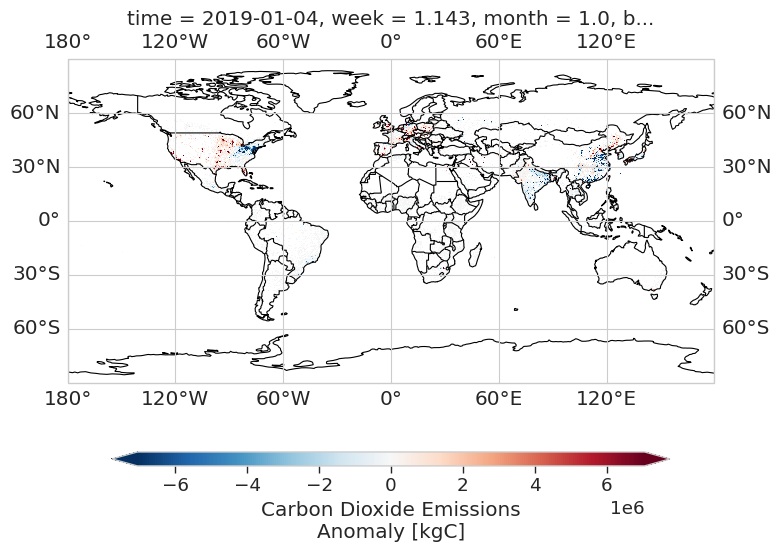

In [2]:
co2 = concat_data(5, method="sum")

# Anomaly Correction
co2 = anomaly_correction_week(co2)
co2 = anomaly_correction_month(co2)
co2 = anomaly_correction_spatial(co2)

# Further reduce data load
co2 = co2.coarsen(time=7, boundary="trim").sum()

# Masking
co2 = mask_population(co2, threshold=0)
co2 = mask_poles(co2)
#co2 = mask_oceans(co2)

plot_world(co2.isel(time=0))
co2

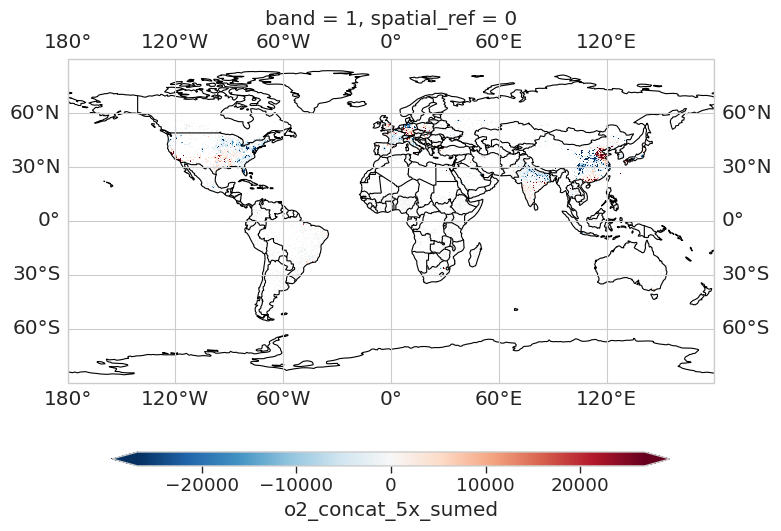

In [3]:
plot_world(co2.mean(dim="time"))

/home/tobias/.cache/pypoetry/virtualenvs/chaotic-carbon-networks-ujXUhOMb-py3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


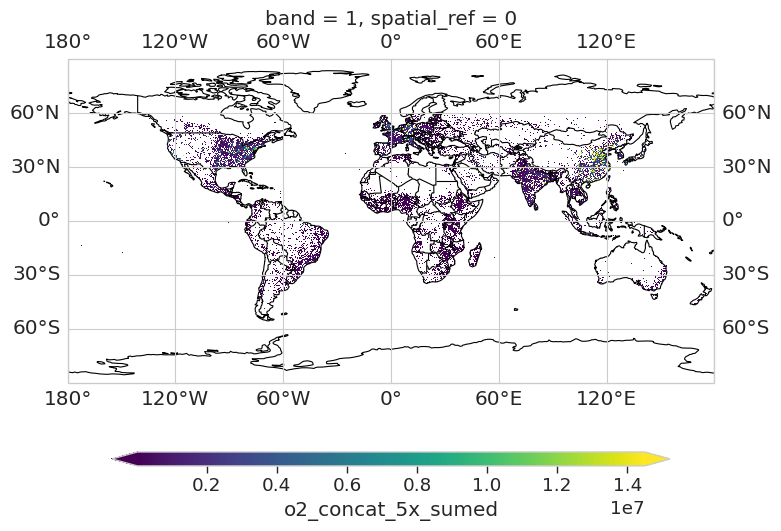

In [4]:
plot_world(co2.std(dim="time"))

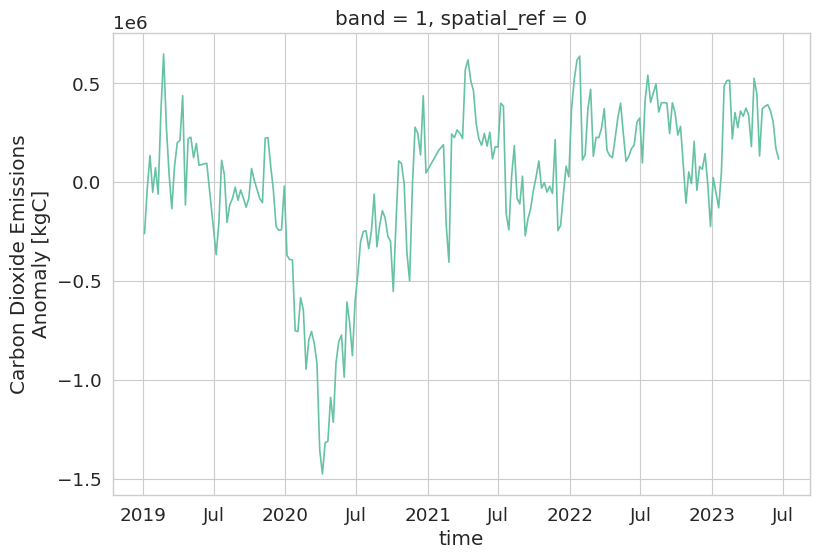

In [5]:
co2.mean(dim=["lat", "lon"], keep_attrs=True).plot()

<xarray.DataArray (vertex: 11042, vertex_other: 11042)> Size: 975MB
array([[0.        , 0.78961757, 0.36730909, ..., 0.5495721 , 0.79509369,
        0.04735868],
       [0.78961757, 0.        , 0.63912574, ..., 0.75433813, 0.45305335,
        0.29845725],
       [0.36730909, 0.63912574, 0.        , ..., 0.78235151, 0.06267565,
        0.37133032],
       ...,
       [0.5495721 , 0.75433813, 0.78235151, ..., 0.        , 0.08632952,
        0.48321314],
       [0.79509369, 0.45305335, 0.06267565, ..., 0.08632952, 0.        ,
        0.32379678],
       [0.04735868, 0.29845725, 0.37133032, ..., 0.48321314, 0.32379678,
        0.        ]])
Coordinates:
  * vertex        (vertex) object 88kB MultiIndex
  * lat           (vertex) float64 88kB 59.75 59.75 59.75 ... -48.75 -53.75
  * lon           (vertex) float64 88kB -159.3 5.25 5.75 ... 169.7 -70.25 -67.75
  * vertex_other  (vertex_other) object 88kB MultiIndex
  * lat_other     (vertex_other) float64 88kB 59.75 59.75 ... -48.75 -53.75
  * lon_other     (vertex_other) float64 88kB -159.3 5.25 5.75 ... -70.25 -67.75
Attributes:
    long_name:     Similarity matrix
    var_desc:      Similarity
    valid_range:   (0, 1)
    actual_range:  (0.0, 0.9999999999033337)

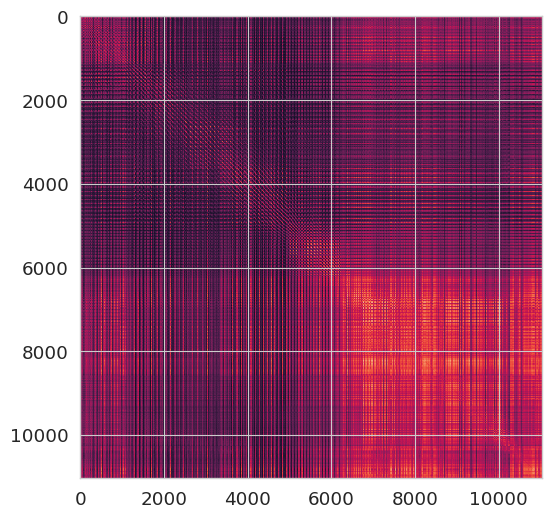

In [6]:
similarity_matrix = calc_similarity_matrix_v4(co2)
plt.imshow(similarity_matrix.values)
plt.draw()
similarity_matrix


(
    array([30218086., 25623112., 18816826., 13324994.,  9166712.,  6561658.,
        5332062.,  4538366.,  3659348.,  4684600.]),
    array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
    <BarContainer object of 10 artists>
)

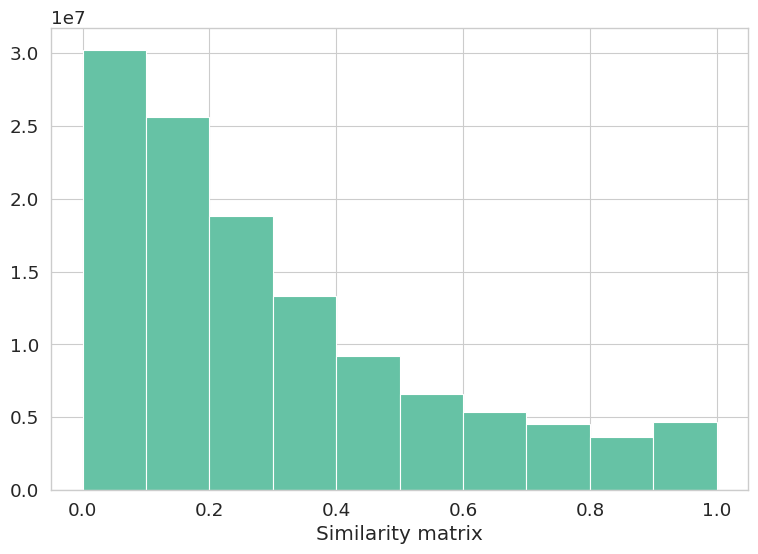

In [7]:
similarity_matrix.plot.hist()

Using a threshold of 0.8594868846433196 for the adjacency matrix

<xarray.DataArray (vertex: 11042, vertex_other: 11042)> Size: 975MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * vertex        (vertex) object 88kB MultiIndex
  * lat           (vertex) float64 88kB 59.75 59.75 59.75 ... -48.75 -53.75
  * lon           (vertex) float64 88kB -159.3 5.25 5.75 ... 169.7 -70.25 -67.75
  * vertex_other  (vertex_other) object 88kB MultiIndex
  * lat_other     (vertex_other) float64 88kB 59.75 59.75 ... -48.75 -53.75
  * lon_other     (vertex_other) float64 88kB -159.3 5.25 5.75 ... -70.25 -67.75
Attributes:
    long_name:     Adjacency matrix
    var_desc:      Connected
    valid_range:   (0, 1)
    actual_range:  (0, 1)

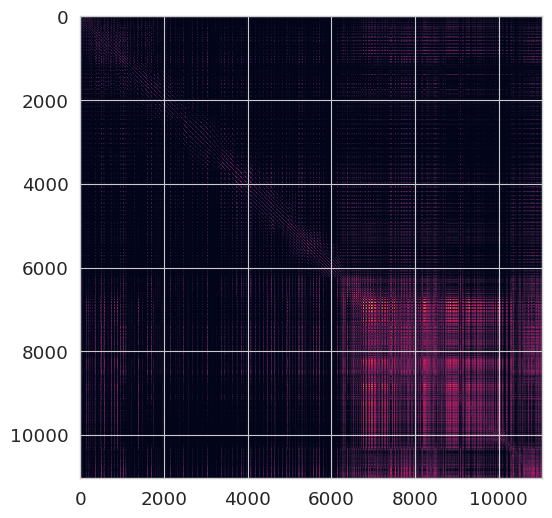

In [8]:
adjacency_matrix = calc_adjacency_matrix(similarity_matrix)
plt.imshow(adjacency_matrix.values)
plt.draw()
adjacency_matrix

<xarray.DataArray (lat: 360, lon: 720)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 3kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 6kB -179.8 -179.3 -178.8 -178.3 ... 178.7 179.2 179.7
Attributes:
    long_name:     Connectivity of vertices
    var_desc:      Connectivity
    units:         °
    valid_range:   (0, inf)
    actual_range:  (0.0, 1882.0)

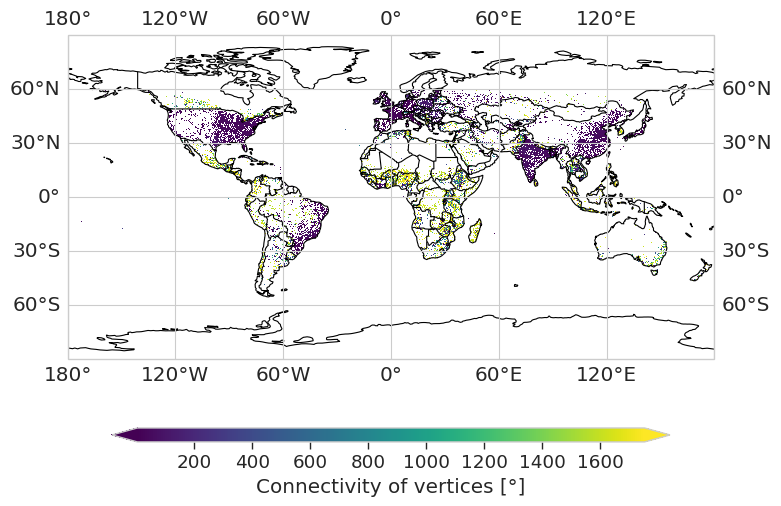

In [9]:
degrees = calc_degrees(adjacency_matrix, weighted=False).reindex_like(co2)
plot_world(degrees)
degrees

<xarray.DataArray (lat: 360, lon: 720)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 3kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 6kB -179.8 -179.3 -178.8 -178.3 ... 178.7 179.2 179.7
Attributes:
    long_name:     Area-weighted connectivity of vertices
    var_desc:      Area-weighted connectivity
    valid_range:   (0, 1)
    actual_range:  (0.0, 10.288462393168164)

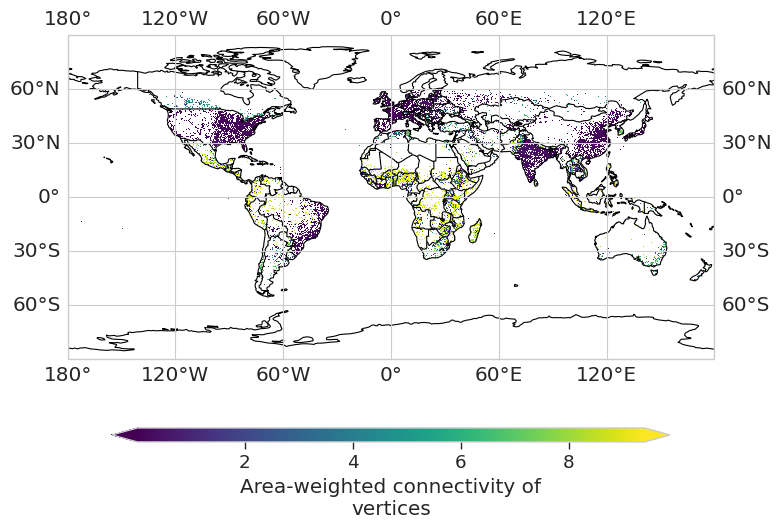

In [10]:
awc = calc_degrees(adjacency_matrix, weighted=True).reindex_like(co2)
plot_world(awc)
awc

/home/tobias/.cache/pypoetry/virtualenvs/chaotic-carbon-networks-ujXUhOMb-py3.11/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray (vertex: 11042, vertex_other: 11042)> Size: 975MB
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
  * vertex        (vertex) object 88kB MultiIndex
  * lat           (vertex) float64 88kB 59.75 59.75 59.75 ... -48.75 -53.75
  * lon           (vertex) float64 88kB -159.3 5.25 5.75 ... 169.7 -70.25 -67.75
  * vertex_other  (vertex_other) object 88kB MultiIndex
  * lat_other     (vertex_other) float64 88kB 59.75 59.75 ... -48.75 -53.75
  * lon_other     (vertex_other) float64 88kB -159.3 5.25 5.75 ... -70.25 -67.75
Attributes:
    long_name:     Link lengths of Adjacency matrix
    units:         km
    var_desc:      Link length
    valid_range:   (0, 20015.114442035923)
    actual_range:  (0.0, 20015.114442035923)

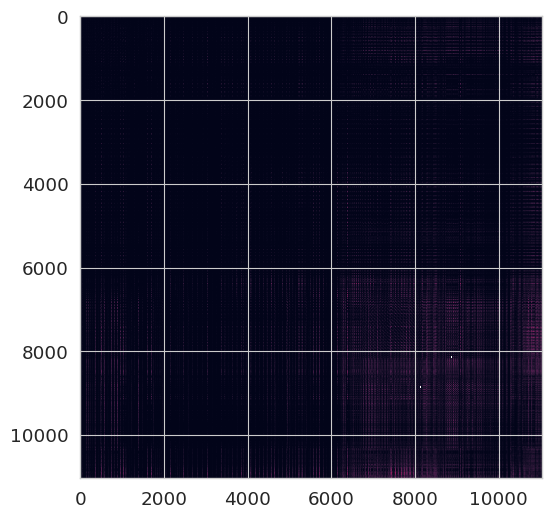

In [11]:
ll_adj_mtx = calc_link_length(adjacency_matrix)
plt.imshow(ll_adj_mtx.values)
plt.draw()
ll_adj_mtx

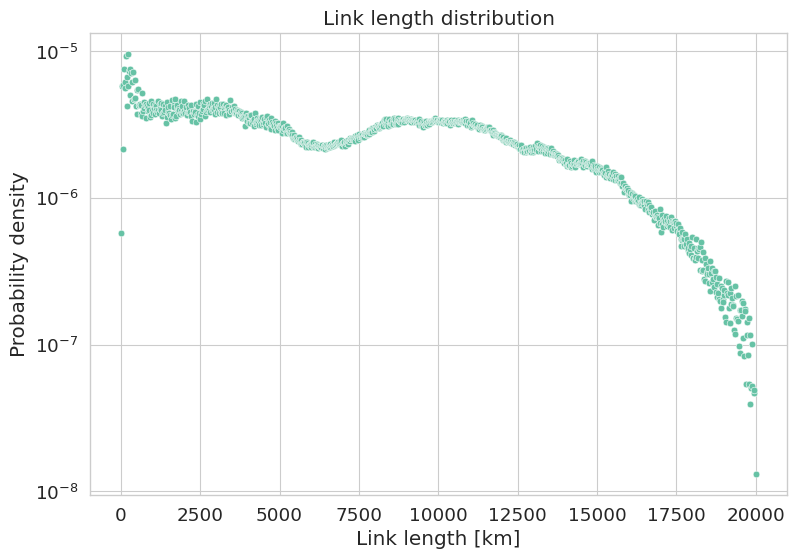

In [12]:
h, b = np.histogram(ll_adj_mtx.where(ll_adj_mtx > 0, 0), density=True, bins=1000)
ax = sns.scatterplot(x=b[1:-1], y=h[1:])
ax.set_yscale('log')
plt.title("Link length distribution")
plt.xlabel("Link length [km]")
plt.ylabel("Probability density")
plt.draw()

<xarray.DataArray (lat: 360, lon: 720)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 3kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 6kB -179.8 -179.3 -178.8 -178.3 ... 178.7 179.2 179.7
Attributes:
    long_name:     Average link length of vertices
    var_desc:      Average link length
    units:         km
    valid_range:   (0, inf)
    actual_range:  (34.79973819303827, 15131.048444642296)

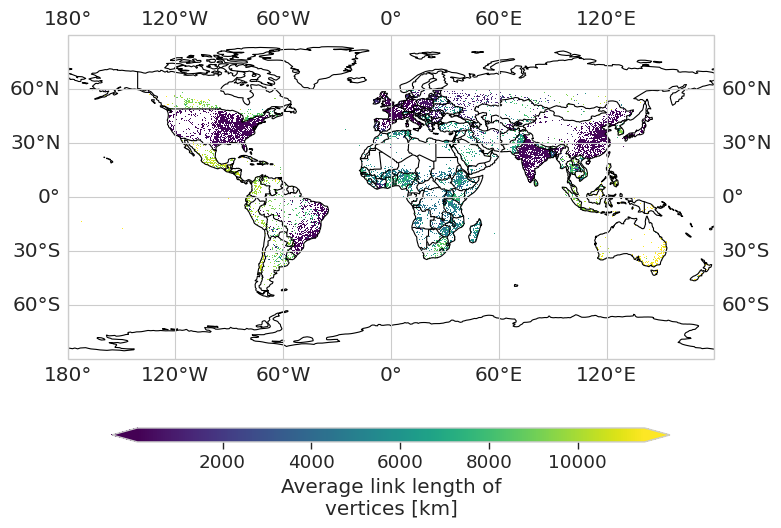

In [13]:
avg_ll = calc_avg_link_length(ll_adj_mtx).reindex_like(co2)
plot_world(avg_ll)
avg_ll

/home/tobias/.cache/pypoetry/virtualenvs/chaotic-carbon-networks-ujXUhOMb-py3.11/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


<xarray.DataArray (lat: 360, lon: 720)> Size: 2MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 3kB 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 6kB -179.8 -179.3 -178.8 -178.3 ... 178.7 179.2 179.7
Attributes:
    long_name:     Corrected Average link length of vertices
    var_desc:      Corrected Average link length
    units:         km
    valid_range:   (0, inf)
    actual_range:  (0.03787208808598126, 11576.38975673324)

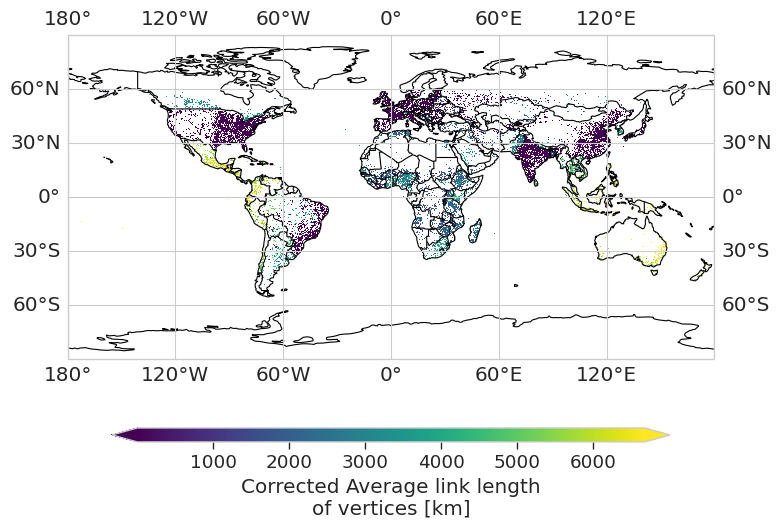

In [14]:
avg_ll = calc_avg_link_length(ll_adj_mtx, weighted=True).reindex_like(co2)
plot_world(avg_ll)
avg_ll